<a href="https://colab.research.google.com/github/Saramando/263F/blob/main/Homework3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch:0, Loss:0.003685239574814042, lr:0.1
Epoch:100, Loss:1.1622948533558056e-05, lr:0.1
Epoch:200, Loss:1.3690133106159811e-05, lr:0.1
Epoch:300, Loss:1.6151969456817803e-05, lr:0.1
Epoch:400, Loss:1.904971983653534e-05, lr:0.1
Epoch:500, Loss:2.2442815037654845e-05, lr:0.1
Epoch:600, Loss:2.6393200084294618e-05, lr:0.1
Epoch:700, Loss:3.0963700423063436e-05, lr:0.1
Epoch:800, Loss:3.621594632411256e-05, lr:0.1
Epoch:900, Loss:4.2207916580743756e-05, lr:0.1
Epoch:1000, Loss:4.89912249705444e-05, lr:0.1
Epoch:1100, Loss:5.66083341013984e-05, lr:0.1
Epoch:1200, Loss:6.508992828090936e-05, lr:0.1
Epoch:1300, Loss:7.445269665168257e-05, lr:0.1
Epoch:1400, Loss:8.469776044686724e-05, lr:0.1
Epoch:1500, Loss:9.580992180399108e-05, lr:0.1
Epoch:1600, Loss:0.00010775782359356201, lr:0.1
Epoch:1700, Loss:0.00012049500596237907, lr:0.1
Epoch:1800, Loss:0.0001339617456631759, lr:0.1
Epoch:1900, Loss:0.0001480874870406008, lr:0.1
Epoch:2000, Loss:0.00016279363051082869, lr:0.1
Epoch:2100, Loss:0

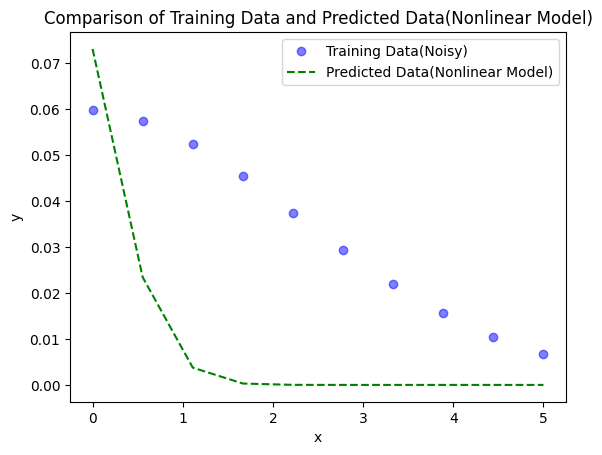

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate 10 random x values within a range
N = 10
x_real = np.linspace(0, 5, N)

# Parameters for the function (can use the previously fitted values or set randomly)
n_true = 0.06
a_true = 0.25
m_true = 0.57
b_true = 0.11

# Generate corresponding y values based on the function with added noise
noise = 0.001 * np.random.normal(0, 0.1, size=x_real.shape)

# Add Gaussian noise
y_real = n_true * np.exp(-a_true * (m_true * x_real + b_true) ** 2) + noise


def loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def grad_m_linear(y_true, y_pred, x):
    return -2 * np.mean(x * (y_true - y_pred))


def grad_b_linear(y_true, y_pred):
    return -2 * np.mean(y_true - y_pred)


def grad_n_nonlinear(y_true, y_pred, y_int, a):
    return -2 * np.mean((y_true - y_pred) * np.exp(-a * y_int))


def grad_a_nonlinear(y_true, y_pred, y_int):
    return 2 * np.mean((y_true - y_pred) * y_pred * (-y_int))


def grad_m_nonlinear(y_true, y_pred, y_base, x, a):
    return 2 * np.mean((y_true - y_pred) * y_pred * (-a) * 2 * y_base * x)


def grad_b_nonlinear(y_true, y_pred, y_base, a):
    return 2 * np.mean((y_true - y_pred) * y_pred * (-a) * 2 * y_base)


def linear_fit(epochs, lr):
    m = np.random.rand()
    b = np.random.rand()

    for epoch in range(epochs):
        y_pred = m * x_real + b

        loss_value = loss(y_real, y_pred)

        dm = grad_m_linear(y_real, y_pred, x_real)
        db = grad_b_linear(y_real, y_pred)

        m -= lr * dm
        b -= lr * db

        if epoch % 100 == 0:
            print(f'Epoch:{epoch}, Loss:{loss_value}')

    y_pred = m * x_real + b
    plt.figure()
    plt.plot(x_real, y_real, 'bo', alpha=0.5, label='Training Data(Noisy)')
    plt.plot(x_real, y_pred, 'g--', label='Predicted Data(Linear Model)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison of Training Data and Predicted Data(Linear Model)')
    plt.legend()
    plt.show()

def nonlinear_fit(epochs, lr):
    # n = np.random.rand()
    n = (np.random.rand() + np.random.rand())/2
    a = np.random.rand()
    m = np.random.rand()
    b = np.random.rand()

    for epoch in range(epochs):
        y_base = m * x_real + b
        y_int = y_base ** 2
        y_pred = n * np.exp(-a * y_int)

        loss_value = loss(y_real, y_pred)

        dn = grad_n_nonlinear(y_real, y_pred, y_int, a)
        da = grad_a_nonlinear(y_real, y_pred, y_int)
        dm = grad_m_nonlinear(y_real, y_pred, y_base, x_real, a)
        db = grad_b_nonlinear(y_real, y_pred, y_base, a)

        n -= lr * dn
        a -= lr * da
        m -= lr * dm
        b -= lr * db

        if epoch % 100 == 0:
            print(f'Epoch:{epoch}, Loss:{loss_value}, lr:{lr}')


    y_int = (m * x_real + b) ** 2
    y_pred = n * np.exp(-a * y_int)

    plt.figure()
    plt.plot(x_real, y_real, 'bo', alpha=0.5, label='Training Data(Noisy)')
    plt.plot(x_real, y_pred, 'g--', label='Predicted Data(Nonlinear Model)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison of Training Data and Predicted Data(Nonlinear Model)')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    nonlinear_fit(10000, 0.00001)

